Group 3

Harrshit Limbodia	2019B4A40815H

Ninaad Pinakin Thakkar 	2019B4A40872H

Gautam Gupta	2019B2A41118H

Karan Moza	2019B4A71372H

Khushi Khanna 	2019B4A10850H

Aryaa Bharani	2019B1A11556H

Arnav Bhatara	2019B4AA1304H

Sankalp Bhadoria	2019B3AA1269H

Abhimanyu Singh Rana	2019B3A80701H

Event: 8th November 2016 Demonetization


In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
hdfcdf = yf.download('HDFCBANK.NS', 
                      start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
hdfcdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,531.500000,536.674988,529.674988,533.650024,509.932648,3421384
2015-12-17,536.950012,542.000000,532.500000,540.125000,516.119812,2439006
2015-12-18,542.500000,542.500000,534.250000,536.500000,512.655945,1586064
2015-12-21,535.875000,539.950012,534.525024,537.700012,513.802734,1548750
2015-12-22,537.250000,538.250000,532.000000,533.224976,509.526520,1214768


In [ ]:
nifty_df = yf.download('^NSEI',start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,7725.250000,7776.600098,7715.750000,7750.899902,7750.899902,154300
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-12-16         NaN
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
                ...   
2016-12-28    0.000249
2016-12-29    0.008520
2016-12-30    0.010093
2017-01-02   -0.000770
2017-01-03    0.001558
Name: Return_NIFTY, Length: 257, dtype: float64


In [ ]:
#removing one enties from NIFTY 50 data
nifty_df.dropna(inplace=True)

In [ ]:
hdfcdf['Return_HDFC'] = np.log(hdfcdf['Adj Close']/hdfcdf['Adj Close'].shift(1))
print(hdfcdf['Return_HDFC']) 

Date
2015-12-16         NaN
2015-12-17    0.012060
2015-12-18   -0.006734
2015-12-21    0.002234
2015-12-22   -0.008358
                ...   
2016-12-28    0.001307
2016-12-29    0.015427
2016-12-30    0.000829
2017-01-02   -0.007573
2017-01-03   -0.006033
Name: Return_HDFC, Length: 259, dtype: float64


In [ ]:
#removing one enties from company data
hdfcdf.dropna(inplace=True)

In [ ]:
hdfcdf

,Open,High,Low,Close,Adj Close,Volume,Return_HDFC
Date,,,,,,,
2015-12-17,536.950012,542.000000,532.500000,540.125000,516.119812,2439006,0.012060
2015-12-18,542.500000,542.500000,534.250000,536.500000,512.655945,1586064,-0.006734
2015-12-21,535.875000,539.950012,534.525024,537.700012,513.802734,1548750,0.002234
2015-12-22,537.250000,538.250000,532.000000,533.224976,509.526520,1214768,-0.008358
2015-12-23,536.299988,538.974976,534.575012,537.049988,513.181519,1506984,0.007148
...,...,...,...,...,...,...,...
2016-12-28,594.950012,597.474976,590.500000,593.375000,571.656982,3253920,0.001307
2016-12-29,592.500000,603.974976,590.724976,602.599976,580.544434,4050408,0.015427
2016-12-30,600.000000,606.000000,599.974976,603.099976,581.026062,2033270,0.000829


In [ ]:
hdfcreturns = hdfcdf['Return_HDFC']
hdfcreturns.head()


Date
2015-12-17    0.012060
2015-12-18   -0.006734
2015-12-21    0.002234
2015-12-22   -0.008358
2015-12-23    0.007148
Name: Return_HDFC, dtype: float64

In [ ]:
niftyreturns = nifty_df['Return_NIFTY']
niftyreturns.head()

Date
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
2015-12-23    0.010203
Name: Return_NIFTY, dtype: float64

In [ ]:
#Combining the NIFTY 50 and Company returns 
returns = pd.merge(niftyreturns,hdfcreturns,how='inner',on='Date')
returns.head()

,Return_NIFTY,Return_HDFC
Date,,
2015-12-17,0.011985,0.012060
2015-12-18,-0.010560,-0.006734
2015-12-21,0.009297,0.002234
2015-12-22,-0.006191,-0.008358
2015-12-23,0.010203,0.007148


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-12-17 to 2017-01-03
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  256 non-null    float64
 1   Return_HDFC   256 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [ ]:
nifty_df.shape

(256, 7)

In [ ]:
nifty_df

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900,0.011985
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400,-0.010560
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300,0.009297
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700,-0.006191
2015-12-23,7830.450195,7871.450195,7826.100098,7865.950195,7865.950195,117900,0.010203
...,...,...,...,...,...,...,...
2016-12-28,8047.549805,8100.549805,8028.399902,8034.850098,8034.850098,126700,0.000249
2016-12-29,8030.600098,8111.100098,8020.799805,8103.600098,8103.600098,178500,0.008520
2016-12-30,8119.649902,8197.000000,8114.750000,8185.799805,8185.799805,127600,0.010093


In [ ]:
returns.shape

(256, 2)

Regression by Market Model

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_HDFC']
x_sm = sm.add_constant(x)

In [ ]:
#Regression - Market model 
marketmodel = sm.OLS(y,x_sm)

In [ ]:
resultsmm = marketmodel.fit()

In [ ]:
resultsmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_HDFC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     291.4
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           4.85e-44
Time:                        22:38:41   Log-Likelihood:                 919.97
No. Observations:                 256   AIC:                            -1836.
Df Residuals:                     254   BIC:                            -1829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.000      0.643      0.521      -0.001       0.001
Return_NIFTY     0.7540      0.044     17.070      0.000       0.667       0.841
==============================================================================
Omnibus:                        1.632   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.357
Skew:                           0.164   Prob(JB):                        0.507
Kurtosis:                       3.138   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
betahdfcmm=resultsmm.params[1]

In [ ]:
resultsmm.f_pvalue

4.853623992228946e-44

In [ ]:
returnshdfc=returns

In [ ]:
returnshdfc['ER_MM']=returnshdfc['Return_NIFTY']*betahdfcmm

In [ ]:
returnshdfc

,Return_NIFTY,Return_HDFC,ER_MM
Date,,,
2015-12-17,0.011985,0.012060,0.009037
2015-12-18,-0.010560,-0.006734,-0.007962
2015-12-21,0.009297,0.002234,0.007010
2015-12-22,-0.006191,-0.008358,-0.004668
2015-12-23,0.010203,0.007148,0.007693
...,...,...,...
2016-12-28,0.000249,0.001307,0.000188
2016-12-29,0.008520,0.015427,0.006424
2016-12-30,0.010093,0.000829,0.007610


Using CAPM

In [ ]:
rfr=0.02/100

In [ ]:
returnshdfc['Rm-Rf']=returnshdfc['Return_NIFTY']-rfr

In [ ]:
x = returns['Rm-Rf']
y = returns['Return_HDFC']
x_sm = sm.add_constant(x)

In [ ]:
capmmodel = sm.OLS(y,x_sm)

In [ ]:
resultscapm = capmmodel.fit()

In [ ]:
resultscapm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_HDFC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     291.4
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           4.85e-44
Time:                        22:39:39   Log-Likelihood:                 919.97
No. Observations:                 256   AIC:                            -1836.
Df Residuals:                     254   BIC:                            -1829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.004      0.316      -0.000       0.001
Rm-Rf          0.7540      0.044     17.070      0.000       0.667       0.841
==============================================================================
Omnibus:                        1.632   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.357
Skew:                           0.164   Prob(JB):                        0.507
Kurtosis:                       3.138   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnshdfc['ER_CAPM']=rfr+resultscapm.params[1]*returnshdfc['Rm-Rf']

In [ ]:
returnshdfc

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.012060,0.009037,0.011785,0.009086
2015-12-18,-0.010560,-0.006734,-0.007962,-0.010760,-0.007913
2015-12-21,0.009297,0.002234,0.007010,0.009097,0.007059
2015-12-22,-0.006191,-0.008358,-0.004668,-0.006391,-0.004619
2015-12-23,0.010203,0.007148,0.007693,0.010003,0.007743
...,...,...,...,...,...
2016-12-28,0.000249,0.001307,0.000188,0.000049,0.000237
2016-12-29,0.008520,0.015427,0.006424,0.008320,0.006474
2016-12-30,0.010093,0.000829,0.007610,0.009893,0.007659


FAMA 3

In [ ]:
famadf=pd.read_csv("C:\\Users\\sanka\\Downloads\\2021-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv")

In [ ]:
famadf.set_index('Date',inplace=True)

In [ ]:
famadf

,SMB,HML,WML,MF,RF,days to event
Date,,,,,,
2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...
2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37
2017-01-02,0.646568,1.114708,0.634339,0.842830,0.024439,38


In [ ]:
famadf

,SMB,HML,WML,MF,RF,days to event
Date,,,,,,
2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...
2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37
2017-01-02,0.646568,1.114708,0.634339,0.842830,0.024439,38


In [ ]:
returnshdfc

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.012060,0.009037,0.011785,0.009086
2015-12-18,-0.010560,-0.006734,-0.007962,-0.010760,-0.007913
2015-12-21,0.009297,0.002234,0.007010,0.009097,0.007059
2015-12-22,-0.006191,-0.008358,-0.004668,-0.006391,-0.004619
2015-12-23,0.010203,0.007148,0.007693,0.010003,0.007743
...,...,...,...,...,...
2016-12-28,0.000249,0.001307,0.000188,0.000049,0.000237
2016-12-29,0.008520,0.015427,0.006424,0.008320,0.006474
2016-12-30,0.010093,0.000829,0.007610,0.009893,0.007659


In [ ]:
returnshdfc.index

DatetimeIndex(['2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [ ]:
famadf.index=pd.to_datetime(famadf.index)

In [ ]:
famadf.index

DatetimeIndex(['2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30',
               ...
               '2016-12-22', '2016-12-23', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-02',
               '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [ ]:
returnshdfc=returnshdfc.join(famadf)

In [ ]:
returnshdfc

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event
Date,,,,,,,,,,,
2015-12-17,0.011985,0.012060,0.009037,0.011785,0.009086,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,-0.010560,-0.006734,-0.007962,-0.010760,-0.007913,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.009297,0.002234,0.007010,0.009097,0.007059,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,-0.006191,-0.008358,-0.004668,-0.006391,-0.004619,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
2015-12-23,0.010203,0.007148,0.007693,0.010003,0.007743,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.001307,0.000188,0.000049,0.000237,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,0.008520,0.015427,0.006424,0.008320,0.006474,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.010093,0.000829,0.007610,0.009893,0.007659,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
X=returnshdfc[['Rm-Rf','SMB','HML']]
y=returnshdfc['Return_HDFC']
X = sm.add_constant(X)

In [ ]:
ff3=sm.OLS(y,X)

In [ ]:
resultsff3=ff3.fit()

In [ ]:
resultsff3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_HDFC   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     99.48
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.66e-42
Time:                        23:00:48   Log-Likelihood:                 922.16
No. Observations:                 256   AIC:                            -1836.
Df Residuals:                     252   BIC:                            -1822.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.140      0.255      -0.000       0.001
Rm-Rf          0.7990      0.050     16.049      0.000       0.701       0.897
SMB            0.0004      0.001      0.723      0.471      -0.001       0.002
HML           -0.0009      0.000     -1.946      0.053      -0.002    1.07e-05
==============================================================================
Omnibus:                        3.168   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.942
Skew:                           0.176   Prob(JB):                        0.230
Kurtosis:                       3.390   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsff3.params[3]

-0.0008778692280416256

In [ ]:
returnshdfc['ER_ff3']=rfr+resultsff3.params[1]*returnshdfc['Rm-Rf']+resultsff3.params[3]*returnshdfc['HML']

FAMA FRENCH 4

In [ ]:
X=returnshdfc[['Rm-Rf','SMB','HML','MF']]
y=returnshdfc['Return_HDFC']
X = sm.add_constant(X)

In [ ]:
ff4=sm.OLS(y,X)
resultsff4=ff4.fit()
resultsff4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_HDFC   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     91.78
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           5.72e-48
Time:                        23:01:11   Log-Likelihood:                 937.51
No. Observations:                 256   AIC:                            -1865.
Df Residuals:                     251   BIC:                            -1847.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.368      0.172      -0.000       0.001
Rm-Rf          1.5757      0.145     10.856      0.000       1.290       1.862
SMB            0.0022      0.001      3.505      0.001       0.001       0.003
HML            0.0005      0.000      1.097      0.274      -0.000       0.002
MF            -0.0091      0.002     -5.656      0.000      -0.012      -0.006
==============================================================================
Omnibus:                        0.702   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.437
Skew:                           0.048   Prob(JB):                        0.804
Kurtosis:                       3.178   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnshdfc['ER_ff4']=rfr+resultsff4.params[1]*returnshdfc['Rm-Rf']+resultsff4.params[3]*returnshdfc['HML']+resultsff4.params[2]*returnshdfc['SMB']+resultsff4.params[4]*returnshdfc['MF']

In [ ]:
returnshdfc

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4
Date,,,,,,,,,,,,,
2015-12-17,0.011985,0.012060,0.009037,0.011785,0.009086,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.008539,0.007659
2015-12-18,-0.010560,-0.006734,-0.007962,-0.010760,-0.007913,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.008462,-0.009313
2015-12-21,0.009297,0.002234,0.007010,0.009097,0.007059,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.006717,0.009432
2015-12-22,-0.006191,-0.008358,-0.004668,-0.006391,-0.004619,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.005335,-0.004799
2015-12-23,0.010203,0.007148,0.007693,0.010003,0.007743,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007703,0.006203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.001307,0.000188,0.000049,0.000237,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.000679,-0.000370
2016-12-29,0.008520,0.015427,0.006424,0.008320,0.006474,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.006517,0.002240
2016-12-30,0.010093,0.000829,0.007610,0.009893,0.007659,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.007986,0.007502


In [ ]:
returnshdfc['AR_MM']=returnshdfc['Return_HDFC']-returnshdfc['ER_MM']

In [ ]:
returnshdfc['AR_CAPM']=returnshdfc['Return_HDFC']-returnshdfc['ER_CAPM']

In [ ]:
returnshdfc['AR_ff3']=returnshdfc['Return_HDFC']-returnshdfc['ER_ff3']

In [ ]:
returnshdfc['AR_ff4']=returnshdfc['Return_HDFC']-returnshdfc['ER_ff4']

In [ ]:
returnshdfc

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.012060,0.009037,0.011785,0.009086,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.008539,0.007659,0.003024,0.002974,0.003522,0.004401
2015-12-18,-0.010560,-0.006734,-0.007962,-0.010760,-0.007913,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.008462,-0.009313,0.001228,0.001179,0.001728,0.002579
2015-12-21,0.009297,0.002234,0.007010,0.009097,0.007059,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.006717,0.009432,-0.004776,-0.004825,-0.004483,-0.007198
2015-12-22,-0.006191,-0.008358,-0.004668,-0.006391,-0.004619,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.005335,-0.004799,-0.003690,-0.003739,-0.003023,-0.003559
2015-12-23,0.010203,0.007148,0.007693,0.010003,0.007743,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007703,0.006203,-0.000546,-0.000595,-0.000555,0.000945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.001307,0.000188,0.000049,0.000237,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.000679,-0.000370,0.001119,0.001070,0.000628,0.001677
2016-12-29,0.008520,0.015427,0.006424,0.008320,0.006474,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.006517,0.002240,0.009003,0.008954,0.008911,0.013187
2016-12-30,0.010093,0.000829,0.007610,0.009893,0.007659,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.007986,0.007502,-0.006781,-0.006830,-0.007157,-0.006673


In [ ]:
returnshdfc_eventwindowbeyond=returnshdfc[returnshdfc['days to event']>=-20]

In [ ]:
returnshdfc_eventwindowbeyond

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.001054,-0.001035,-0.001573,-0.000986,0.228604,0.717509,0.078106,-0.143927,0.024852,-20,-0.001687,-0.000071,-0.000018,-0.000068,0.000633,-0.000983
2016-10-10,0.001287,0.002924,0.000970,0.001087,0.001020,0.213081,0.713678,-0.218750,0.292234,0.024852,-19,0.000442,0.000097,0.001954,0.001904,0.002482,0.002827
2016-10-13,-0.015675,-0.016961,-0.011820,-0.015875,-0.011770,-0.069428,-0.664808,0.133060,-1.340170,0.024653,-18,-0.011900,-0.013078,-0.005141,-0.005190,-0.005060,-0.003883
2016-10-14,0.001172,-0.000753,0.000883,0.000972,0.000933,0.562358,0.113083,0.519589,0.555531,0.024653,-17,0.000877,-0.002048,-0.001636,-0.001685,-0.001630,0.001295
2016-10-17,-0.007367,-0.019285,-0.005555,-0.007567,-0.005506,0.958439,-0.016732,0.153664,-0.846533,0.024653,-16,-0.005831,-0.001884,-0.013730,-0.013779,-0.013454,-0.017401
2016-10-18,0.018316,0.016149,0.013811,0.018116,0.013860,0.115323,0.401454,-0.157189,1.273019,0.024653,-15,0.014322,0.017581,0.002338,0.002289,0.001827,-0.001432
2016-10-19,-0.002169,0.000397,-0.001635,-0.002369,-0.001586,0.494551,0.671722,-0.331019,0.238067,0.024653,-14,-0.002282,-0.004256,0.002033,0.001983,0.002680,0.004653
2016-10-20,0.004643,-0.002267,0.003501,0.004443,0.003550,-0.248365,1.488726,-0.118671,0.212062,0.024809,-13,0.002443,0.005523,-0.005769,-0.005818,-0.004711,-0.007791
2016-10-21,-0.000730,0.012034,-0.000551,-0.000930,-0.000501,0.652782,-0.368136,0.081786,0.098028,0.024809,-12,-0.000220,-0.000924,0.012585,0.012535,0.012254,0.012958


In [ ]:
returnshdfc_eventwindowbeyond['CAR_MM']=returnshdfc_eventwindowbeyond['AR_MM'].cumsum()

In [ ]:
returnshdfc_eventwindowbeyond['CAR_CAPM']=returnshdfc_eventwindowbeyond['AR_CAPM'].cumsum()

In [ ]:
returnshdfc_eventwindowbeyond['CAR_ff3']=returnshdfc_eventwindowbeyond['AR_ff3'].cumsum()

In [ ]:
returnshdfc_eventwindowbeyond['CAR_ff4']=returnshdfc_eventwindowbeyond['AR_ff4'].cumsum()

In [ ]:
returnshdfc_eventwindowbeyond

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.001054,-0.001035,-0.001573,-0.000986,0.228604,0.717509,0.078106,-0.143927,0.024852,...,-0.001687,-0.000071,-0.000018,-0.000068,0.000633,-0.000983,-0.000018,-0.000068,0.000633,-0.000983
2016-10-10,0.001287,0.002924,0.000970,0.001087,0.001020,0.213081,0.713678,-0.218750,0.292234,0.024852,...,0.000442,0.000097,0.001954,0.001904,0.002482,0.002827,0.001935,0.001837,0.003115,0.001843
2016-10-13,-0.015675,-0.016961,-0.011820,-0.015875,-0.011770,-0.069428,-0.664808,0.133060,-1.340170,0.024653,...,-0.011900,-0.013078,-0.005141,-0.005190,-0.005060,-0.003883,-0.003206,-0.003353,-0.001945,-0.002040
2016-10-14,0.001172,-0.000753,0.000883,0.000972,0.000933,0.562358,0.113083,0.519589,0.555531,0.024653,...,0.000877,-0.002048,-0.001636,-0.001685,-0.001630,0.001295,-0.004842,-0.005039,-0.003575,-0.000745
2016-10-17,-0.007367,-0.019285,-0.005555,-0.007567,-0.005506,0.958439,-0.016732,0.153664,-0.846533,0.024653,...,-0.005831,-0.001884,-0.013730,-0.013779,-0.013454,-0.017401,-0.018572,-0.018818,-0.017029,-0.018145
2016-10-18,0.018316,0.016149,0.013811,0.018116,0.013860,0.115323,0.401454,-0.157189,1.273019,0.024653,...,0.014322,0.017581,0.002338,0.002289,0.001827,-0.001432,-0.016233,-0.016529,-0.015201,-0.019577
2016-10-19,-0.002169,0.000397,-0.001635,-0.002369,-0.001586,0.494551,0.671722,-0.331019,0.238067,0.024653,...,-0.002282,-0.004256,0.002033,0.001983,0.002680,0.004653,-0.014201,-0.014545,-0.012522,-0.014924
2016-10-20,0.004643,-0.002267,0.003501,0.004443,0.003550,-0.248365,1.488726,-0.118671,0.212062,0.024809,...,0.002443,0.005523,-0.005769,-0.005818,-0.004711,-0.007791,-0.019969,-0.020363,-0.017232,-0.022715
2016-10-21,-0.000730,0.012034,-0.000551,-0.000930,-0.000501,0.652782,-0.368136,0.081786,0.098028,0.024809,...,-0.000220,-0.000924,0.012585,0.012535,0.012254,0.012958,-0.007385,-0.007828,-0.004978,-0.009756


In [ ]:
returnshdfc

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.012060,0.009037,0.011785,0.009086,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.008539,0.007659,0.003024,0.002974,0.003522,0.004401
2015-12-18,-0.010560,-0.006734,-0.007962,-0.010760,-0.007913,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.008462,-0.009313,0.001228,0.001179,0.001728,0.002579
2015-12-21,0.009297,0.002234,0.007010,0.009097,0.007059,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.006717,0.009432,-0.004776,-0.004825,-0.004483,-0.007198
2015-12-22,-0.006191,-0.008358,-0.004668,-0.006391,-0.004619,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.005335,-0.004799,-0.003690,-0.003739,-0.003023,-0.003559
2015-12-23,0.010203,0.007148,0.007693,0.010003,0.007743,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007703,0.006203,-0.000546,-0.000595,-0.000555,0.000945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.001307,0.000188,0.000049,0.000237,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.000679,-0.000370,0.001119,0.001070,0.000628,0.001677
2016-12-29,0.008520,0.015427,0.006424,0.008320,0.006474,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.006517,0.002240,0.009003,0.008954,0.008911,0.013187
2016-12-30,0.010093,0.000829,0.007610,0.009893,0.007659,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.007986,0.007502,-0.006781,-0.006830,-0.007157,-0.006673


In [ ]:
returnshdfc_eventwindowbeyond[['Return_HDFC','CAR_MM']]

,Return_HDFC,CAR_MM
Date,,
2016-10-07,-0.001054,-0.000018
2016-10-10,0.002924,0.001935
2016-10-13,-0.016961,-0.003206
2016-10-14,-0.000753,-0.004842
2016-10-17,-0.019285,-0.018572
2016-10-18,0.016149,-0.016233
2016-10-19,0.000397,-0.014201
2016-10-20,-0.002267,-0.019969
2016-10-21,0.012034,-0.007385


In [ ]:
returnshdfcfinal=returnshdfc.join(returnshdfc_eventwindowbeyond[['CAR_MM','CAR_CAPM','CAR_ff3','CAR_ff4']],on='Date',how='left')

In [ ]:
returnshdfcfinal.columns

Index(['Return_NIFTY', 'Return_HDFC', 'ER_MM', 'Rm-Rf', 'ER_CAPM', 'SMB',
       'HML', 'WML', 'MF', 'RF', 'days to event', 'ER_ff3', 'ER_ff4', 'AR_MM',
       'AR_CAPM', 'AR_ff3', 'AR_ff4', 'CAR_MM', 'CAR_CAPM', 'CAR_ff3',
       'CAR_ff4'],
      dtype='object')

In [ ]:
#final data with all AR, CAR, factors of APM and expected returns acc. to diff. models
returnshdfcfinal

,Return_NIFTY,Return_HDFC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.012060,0.009037,0.011785,0.009086,-0.102805,1.226592,0.346055,1.263357,0.028256,...,0.008539,0.007659,0.003024,0.002974,0.003522,0.004401,NaN,NaN,NaN,NaN
2015-12-18,-0.010560,-0.006734,-0.007962,-0.010760,-0.007913,0.588487,0.073747,0.526803,-0.667976,0.028256,...,-0.008462,-0.009313,0.001228,0.001179,0.001728,0.002579,NaN,NaN,NaN,NaN
2015-12-21,0.009297,0.002234,0.007010,0.009097,0.007059,0.413700,0.855782,-0.658280,0.708558,0.028256,...,0.006717,0.009432,-0.004776,-0.004825,-0.004483,-0.007198,NaN,NaN,NaN,NaN
2015-12-22,-0.006191,-0.008358,-0.004668,-0.006391,-0.004619,0.544714,0.488610,0.026780,-0.394539,0.028256,...,-0.005335,-0.004799,-0.003690,-0.003739,-0.003023,-0.003559,NaN,NaN,NaN,NaN
2015-12-23,0.010203,0.007148,0.007693,0.010003,0.007743,-0.862967,0.557727,-0.483292,0.892845,0.028256,...,0.007703,0.006203,-0.000546,-0.000595,-0.000555,0.000945,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.001307,0.000188,0.000049,0.000237,0.987619,-0.501282,-0.077401,0.278990,0.024186,...,0.000679,-0.000370,0.001119,0.001070,0.000628,0.001677,-0.016366,-0.019072,-0.010642,-0.023114
2016-12-29,0.008520,0.015427,0.006424,0.008320,0.006474,-0.609323,0.376913,0.296232,1.086604,0.024439,...,0.006517,0.002240,0.009003,0.008954,0.008911,0.013187,-0.007363,-0.010118,-0.001731,-0.009927
2016-12-30,0.010093,0.000829,0.007610,0.009893,0.007659,0.292598,0.134040,-0.193442,0.984796,0.024439,...,0.007986,0.007502,-0.006781,-0.006830,-0.007157,-0.006673,-0.014144,-0.016948,-0.008888,-0.016600


Description of various factors used in above APM

- Market Model:For the market index model, we use the actual return of the index as the independent variable and the actual returns of the security as the dependent variable for the regression.

- CAPM:In the CAPM model, we use the risk premium as the independent variable and the actual returns of the security as the dependent variable for the regression.

- FF3:For Fama 3 factor model, we defined big firms (B) as the top 10% by market capitalization and classified the remaining firms as smallfirms (S), Growth stocks (low value group), G, comprised the bottom 30% stocks in terms of the B/M ratio.The remaining stocks were grouped as neutral (N) stocks,the value factor HML (High minus Low)is defined as the simple average of two differences: (Small Value companies - Small Growth companies) and (Big value companies - Big growth companies),the value factor SMB (Small minus Big)is the simple average of three return differences: (Small Growth companies − Big growth companies), (Small neutral companies − Big Neutral companies) and (Small Value companies − Big value companies)High value group, V , consisted of the top 30% stocks in terms of the B/M ratio.The third factor being the market risk premium to compute beta via regression.

- FF4:For Fama 4 factor model, we used HML, SMB and market risk premium as in the 3 factor model and in additon, the momentum factor MF for the regression to find beta.

Plotting graphs (CAR vs Days Rel. to Event)

<AxesSubplot:xlabel='days to event'>

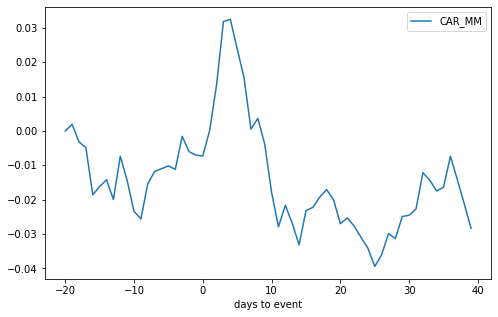

In [ ]:
returnshdfcfinal.plot(x='days to event', y='CAR_MM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

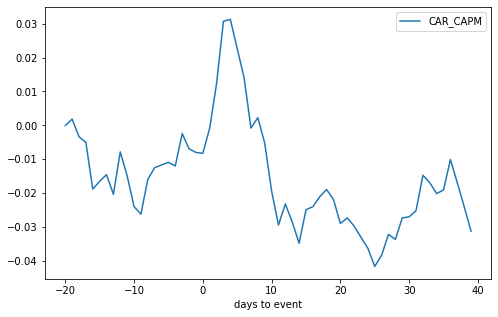

In [ ]:
returnshdfcfinal.plot(x='days to event', y='CAR_CAPM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

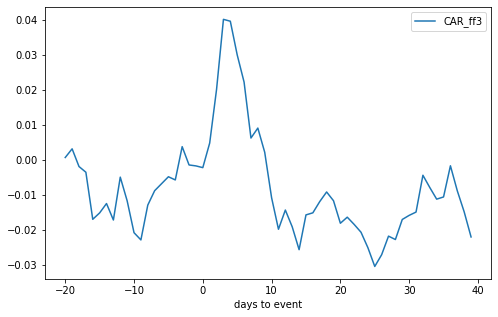

In [ ]:
returnshdfcfinal.plot(x='days to event', y='CAR_ff3',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

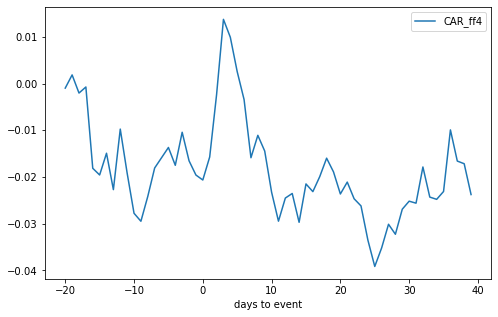

In [ ]:
returnshdfcfinal.plot(x='days to event', y='CAR_ff4',figsize=(8,5))

Final Conclusions (Interpretation of above Graphs)

- Market Model:The figure suggests that the capital market perceives this event to be favourable for this particular security although there is a decline within the event window.

- CAPM:The figure suggests that the capital market perceives this event to be favourable for this particular security although there is a decline within the event window.

- FF3:The figure suggests that the capital market perceives this event to be favourable for this particular security although there is a decline within the event window.

- FF4:The figure suggests that the capital market perceives this event to be favourable for this particular security although there is a decline within the event window.